# Oscilloscope

With the PSLab's oscilloscope, we can capture a time series of voltage values on up to three channels simultaneously. In this tutorial, we will learn how to use pslab-python to control the oscilloscope.

Start by importing the library and connecting to the device:

In [21]:
import pslab
psl = pslab.ScienceLab()

The `ScienceLab` class provides a common interface to the PSLab's instruments, the oscilloscope being one example. Let's take a look at how we can use it to collect some data:

In [22]:
x, y = psl.oscilloscope.capture(channels=1, samples=5, timegap=10)
print("x:", x)
print("y:", y)

x: [ 0. 10. 20. 30. 40.]
y: [0.07655678 0.07655678 0.07655678 0.06849817 0.09267399]


Here, we tell the oscilloscope to read five voltage samples from one channel (specifically, the CH1 pin), with each sample being read ten microseconds after the previous one. The `Oscilloscope.capture` method returns a pair of arrays. The first array contains timestamps in microseconds for when every sample was collected, while the second array contains the actual samples.

Note that the first x value is zero. This marks the starting point for data collection, and every subsequent x value is the number of µs that have passed since reading began.

The y values are all close to zero, which is unsurprising since nothing is connected to CH1. They're not *exactly* zero, which is due to a number of factors such as electromagnetic noise in the environment, electromagnetic noise from the PSLab itself, and from imperfections in the ADC.

Looking at the data in this manner is fine for very short time series, but quickly becomes unwieldy when we increase the number of samples.

In [23]:
x, y = psl.oscilloscope.capture(channels=1, samples=500, timegap=10)
print("x:", x)
print("y:", y)

x: [   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070.
 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190.
 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310.
 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430.
 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530. 1540. 1550.
 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630.

Not exactly easy to read. Of course, we are using an oscilloscope, so it makes more sense to plot the data. The `matplotlib` library provides a convenient way to accomplish this.:

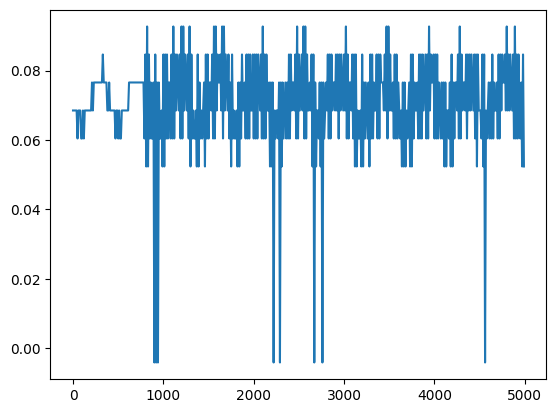

In [24]:
import matplotlib.pyplot as plt
x, y = psl.oscilloscope.capture(channels=1, samples=500, timegap=10)
plt.plot(x, y)

Let's use the programmable power supply from the previous chapter to generate a more interesting signal:

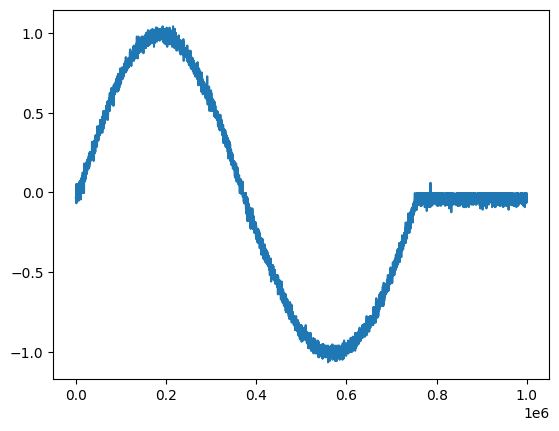

In [10]:
import numpy as np
import time
x = np.arange(0, 2 * np.pi, np.pi / 100)
y = np.sin(x)
(x,) = psl.oscilloscope.capture(1, 10000, 100, block=False)
for v in y:
    psl.power_supply.pv1 = v
(y,) = psl.oscilloscope.fetch_data()
plt.plot(x, y)

Next, we're going to sample data from two channels at once, and plot the result:

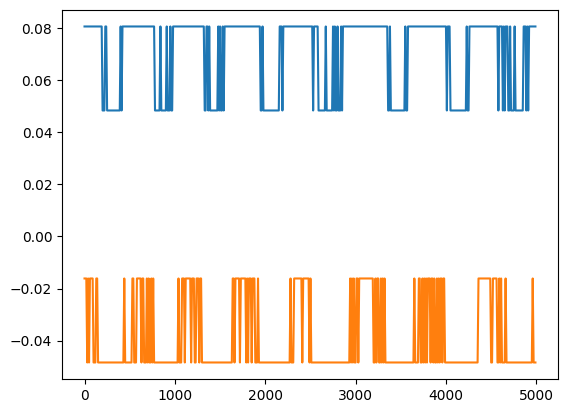

In [42]:
x, y, z = psl.oscilloscope.capture(channels=2, samples=500, timegap=10)
plt.plot(x, y, x, z)

Note that we need to assign one additional variable, z. This is because `Oscilloscope.capture` returns one additional array for every sampled channel. The y variable holds the samples from CH1, as before, and z holds the samples from CH2.

Collecting samples from three channels follows the sampe principle; just add an additional capture variable to hold the samples from CH3.

That's the basic features of the PSLab's oscilloscope. It has more features that we haven't covered yet, including triggering and sample range selection, but before we look at those we need to introduce a few other instruments.